In [1]:
cd /home/tijmen/tudelft/thesis/metaengineering

/home/tijmen/tudelft/thesis/metaengineering


In [2]:
from typing import DefaultDict, List, Hashable, Dict, Any

from src.utils.utils import get_generator, get_project_root

from src.pipeline.config import DataLoaderConfig, TaskLoaderConfig
from src.pipeline.taskloader import TaskLoader
from src.pipeline.dataloader import DataLoader

from src.orchestrator.trainer import Trainer

from src.settings.tier import Tier
from src.settings.strategy import Strategy

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DataLoader.DATA_FOLDER = f'{get_project_root()}/data/training/'
tier = Tier.TIER0

dl_config = DataLoaderConfig(
    additional_filters=['is_precursor'],
    additional_transforms=["log_fold_change_protein"]
)

dl = DataLoader()
dl.prepare_dataloader(dl_config)

tl = TaskLoader()
tl.prepare_taskloader(TaskLoaderConfig())

strategy = Strategy.ALL
gen = get_generator(dl, tl, strategy, tier)
tf = next(gen)

In [4]:
# PDC1, PDC2, PDC5, PDC6
pdc_enzymes = ["YLR044C", "YDR081C", "YLR134W", "YGR087C"]

for pdc_enzyme in pdc_enzymes:
    if pdc_enzyme in tf.x.columns:
        print(pdc_enzyme)

YLR044C
YGR087C


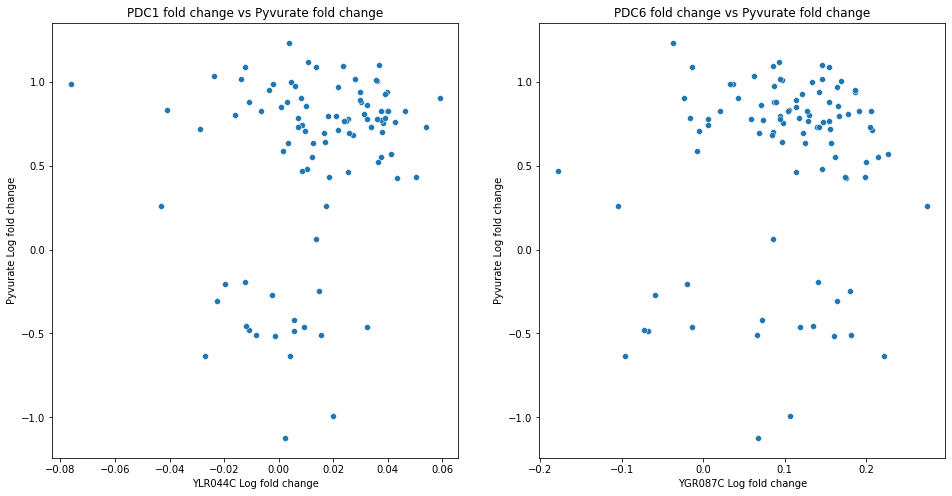

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
_df = pd.concat([
    tf.x.droplevel(1).drop_duplicates(), 
    tf.y.unstack(1)
], axis=1)

sns.scatterplot(
    data=_df,
    x="YLR044C",
    y="pyr",
    ax=ax1
).set(
    title='PDC1 fold change vs Pyvurate fold change',
    xlabel='YLR044C Log fold change',
    ylabel='Pyvurate Log fold change'
)
sns.scatterplot(
    data=_df,
    x="YGR087C",
    y="pyr",
    ax=ax2,
).set(
    title="PDC6 fold change vs Pyvurate fold change",
    xlabel='YGR087C Log fold change',
    ylabel='Pyvurate Log fold change'
)
plt.show()

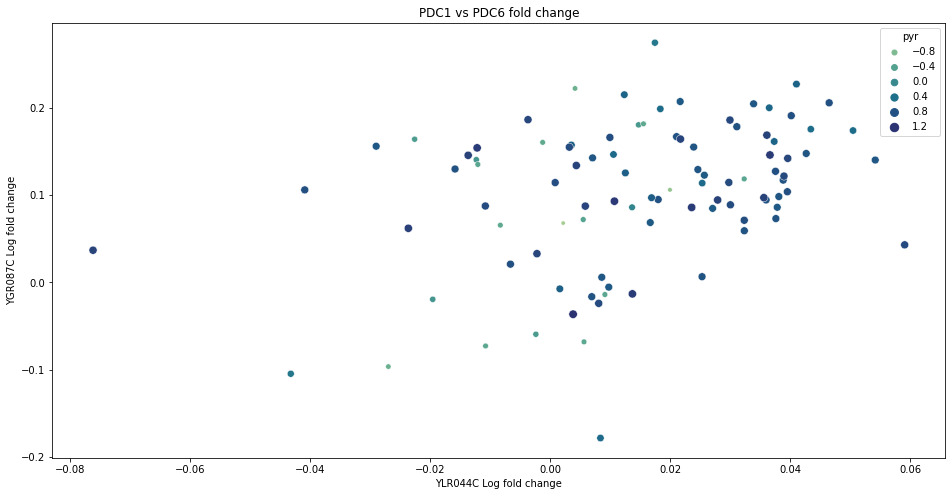

In [25]:
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 8))
_df = pd.concat([
    tf.x.droplevel(1).drop_duplicates(), 
    tf.y.unstack(1)
], axis=1)

sns.scatterplot(
    data=_df,
    x="YLR044C",
    y="YGR087C",
    hue='pyr',
    size='pyr',
    palette='crest',
    ax=ax1,
).set(
    title='PDC1 vs PDC6 fold change',
    xlabel='YLR044C Log fold change',
    ylabel='YGR087C Log fold change'
)
plt.show()

# Load optimal model

In [26]:
import pickle

In [36]:
with open(f'./model/Tier.TIER0/Strategy.ALL_all.pickle', 'rb') as handle:
    model = pickle.load(handle)
    
predictions = model.predict(tf.x.xs(key='pyr', axis=0, level=1))

In [45]:
_df = pd.concat([
    tf.x.droplevel(1).drop_duplicates(), 
    tf.y.unstack(1)
], axis=1)
_df = _df.assign(predictions=predictions)
_df = _df[['YLR044C', 'YGR087C', 'pyr', 'predictions']].reset_index()

_df = pd.concat([
    _df[['YLR044C', 'YGR087C', 'pyr']].rename({'pyr': 'fc'}, axis=1).assign(label='gt'),
    _df[['YLR044C', 'YGR087C', 'predictions']].rename({'predictions': 'fc'}, axis=1).assign(label='predicted'),
], axis=0, ignore_index=True)

_df

,YLR044C,YGR087C,fc,label
0,0.014724,0.180344,-0.249019,gt
1,0.029955,0.185848,0.939919,gt
2,-0.01081,0.087422,0.881808,gt
3,0.025304,0.006475,0.780766,gt
4,0.01235,0.214917,0.555111,gt
...,...,...,...,...
185,0.038955,0.121676,0.787768,predicted
186,0.059067,0.042946,0.695472,predicted
187,0.005848,0.087305,0.447611,predicted
188,0.023908,0.15493,-0.303332,predicted


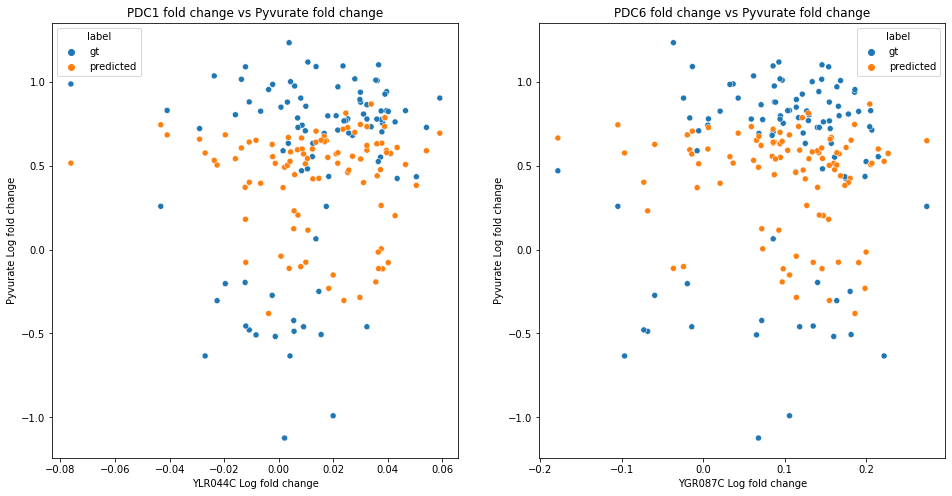

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
_df = pd.concat([
    tf.x.droplevel(1).drop_duplicates(), 
    tf.y.unstack(1)
], axis=1)
_df = pd.concat([
    tf.x.droplevel(1).drop_duplicates(), 
    tf.y.unstack(1)
], axis=1)
_df = _df.assign(predictions=predictions)
_df = _df[['YLR044C', 'YGR087C', 'pyr', 'predictions']].reset_index()

_df = pd.concat([
    _df[['YLR044C', 'YGR087C', 'pyr']].rename({'pyr': 'fc'}, axis=1).assign(label='gt'),
    _df[['YLR044C', 'YGR087C', 'predictions']].rename({'predictions': 'fc'}, axis=1).assign(label='predicted'),
], axis=0, ignore_index=True)

sns.scatterplot(
    data=_df,
    x="YLR044C",
    y="fc",
    hue='label',
    ax=ax1
).set(
    title='PDC1 fold change vs Pyvurate fold change',
    xlabel='YLR044C Log fold change',
    ylabel='Pyvurate Log fold change'
)
sns.scatterplot(
    data=_df,
    x="YGR087C",
    y="fc",
    hue='label',
    ax=ax2,
).set(
    title="PDC6 fold change vs Pyvurate fold change",
    xlabel='YGR087C Log fold change',
    ylabel='Pyvurate Log fold change'
)
plt.show()